### Unidad I. Variables, distribuciones y pruebas de hipótesis. 

## Variables aleatorias y funciones de distribución. 

- [Conceptos de variables aleatorias](#Conceptos-de-variables-aleatorias), [funciones de distribución](#Funciones-de-distribución), variables aleatorias discretas y continuas, [niveles de medición](#Niveles-de-medición).  
- [Distribuciones importantes](#Distribuciones-importantes)  
- [Generación de distribuciones a partir de operaciones con variables aleatorias conocidas.](#Generación-de-distribuciones)  

## Conceptos de variables aleatorias

- **Variable categórica o cualitativas:** Variables que representan *grupos* o *categorías*. Puede tener escala **nominal** u **ordinal**. Las variables *nominales* no tienen un orden definido, mientras las *ordinales* o *casi cuantitativas* tienen un orden definido. Es importante notar que los métodos desarrollados para variables *ordinales* no pueden ser utilizados con variables *nominales*. Los métodos para variables *nominales* pueden ser utilizados con variables *ordinales*, pero se pierde **poder** en el proceso, debido a que no se utiliza la información relativa al orden. La variables cualitativas con solo dos niveles suelen denominarse binarias, dicotómicas o booleanas.
- **Variable cuantitativas:** Pueden ser **discretas** o **continuas**.

Las variables categóricas suelen representarse en R usando `factor`s y tienen una representación especial en la librería *DataFrames* de Julia mediante el tipo de datos `PooledDataArray`(cada nivel de la variable categórica pertenece a un *pool* o grupo de niveles posibles).

En algunos análisis estadísticos, las variables aleatorias pueden clasificarse como variables de **variable respuesta** y **variable explicativa**. La variable respuesta, es a veces llamada *dependiente* suele representarse en el eje *Y*. La variable explicativa o *independiente*, es la que suele controlarse en el diseño experimental y suele representarse en el eje *X*.

Tanto la `formula` de R como la `Formula` de la biblioteca *DataFrames* de Julia ubican las variables respuesta a la izquierda y las variables explicativas a la derecha:
```julia
Y ~ X
```

## Funciones de distribución

### Función de masa/densidad de probabilidad

La función de densidad de probabilidad (*PDF* por *Probability Density Function*)  o de masa de probabilidad (*PMF* por *Probability Mass Function*) describen la probabilidad relativa de una variable a tomar un cierto valor. En general, el término *masa* (*PMF*) se utiliza para variable categóricas o discretas mientras el de *densidad* (*PDF*) se usa con variables continuas.  
Sólo en el caso de variables discretas, la función de masa de probabilidad para la variable $X$ ($PMF_X$) evaluada en un punto $x$ retorna la probabilidad de que la variable $X$ sea igual a $x$: 

$$PMF_X(x) = P(X=x)$$  

Las funciones de masa/densidad de probabilidad son no-negativas a lo largo de todo su dominio. En el caso de las funciones de masa de probabilidad, la imagen sólo puede tomar valores en el intervalo cerrado $[0,1]$. La suma de las probabilidades (imagen de la $PMF$) para todos los posibles valores una variable discreta $X$ debe ser igual a 1, es decir, al menos uno de sus valores tiene que ocurrir.

$$\sum\limits_{x} PMF_X(x) = 1$$

Evaluar la función de densidad de probabilidad de una variable continua $X$, $PDF_X$, en un punto $x$ no retorna la probabilidad de ese punto. Sólo obtenemos probabilidades a partir de una función de densidad de probabilidad integrandola en un determinado intervalo (la probabilidad es el área bajo la *PDF*). No existe la probabilidad de un punto para variables continuas, así como no existe el área bajo un punto.

$$\int_{a}^{b} PDF_X(X) dX = P(a \leqslant X \leqslant b)$$

La integral de una *PDF* sobre todo su dominio, es decir el área total bajo la *PDF* debe ser 1.

### Función de distribución acumulada

La función de distribución acumulada (**CDF** por *Cumulative Distribution Function*, a veces llamada **CMF** por *Cumulative Mass Function* en el caso de variables categóricas) retorna la probabilidad de que una variable aleatoria no nominal sea menor a un determinado valor.

$$CDF_X(x) = P(X \leqslant x)$$

En el caso de variable categóricas, esto se logra sumando los valores de las probabilidades *PMF* para todos los valores inferiores o iguales a $x$:

$$ CDF_X(x) = \sum\limits_{X \leqslant x} PMF_X(x) $$ 

Para variables continuas, es la integral desde menos infinito (o el menor valor del dominio) hasta $x$:

$$CDF_X(x) = \int_{-\infty}^{x} PDF_X(X) dX $$

La imagen de una CDF es el intervalo $[0,1]$, siendo ésta función monótona creciente.  
Es fácil obtener la probabilidad de que un valor de $X$ caiga dentro de un cierto intervalo $(a,b]$ usando su *CDF*:

  $$P(a < X \leqslant b) = CDF_X(b) - CDF_X(a)$$

Las CDF suelen ser útiles en los *tests de hipótesis*, donde es necesario calcular la probabilidad de observar un valor mayor o menor a un cierto valor $x$. En el caso de querer calcular la probabilidad de observar un valor mayor a $x$  suele usarse la **CCDF** (*Complementary Cumulative Distribution Function*):

$$CCDF(x) = P(X > x) = 1 - CDF(x)$$

## Niveles de medición

Una *variable aleatoria* es una función que puede tomar una serie de valores medibles u observables, estando la frecuencia de aparición de esos valores asociados a una distribución de probabilidad. Estas variables resultan de *experimentos aleatorios*, en los cuales dada las mismas condiciones iniciales no se obtienen los mismos resultados en cada *experiencia* o *prueba*.

Los resultados de una *variable aleatoria* pueden medirse en diferentes *escalas de medida* dependiendo de su naturaleza o de la necesidad. Existen diferentes escalas de medidas, siendo la primera la propuesta por el psicólogo *Stanley Smith Stevens*:


| Nivel | Variable | Precisión | Descripción  | Operaciones |
|-------|----------|-----------|--------------|-------------|
| Nominal | Cualitativas | Menor | No hay orden | `==` `!=` |
| Ordinal | Cualitativas, Cuantitativas | Intermedia | Hay orden pero no hay distancias | ... `<` `>` `<=` `>=` |
| Intervalar | Cuantitativas | Intermedia | El cero/la escala es arbitrario/a | ... `+` `-` |
| Racional | Cuantitativas | Mayor | El cero/la escala no es arbitrario/a *(ej. MKS)* | ... `/` `//` ... *(todas)* |

## Distribuciones importantes

La distribuciones más conocidas para datos continuos son la distribución [Normal](#Distribución-Normal) y la distribución [T](#Distribución-T). Mientras las distribuciones más importantes para datos categóricos son la **Binomial**, la **Multinomial** y la **Poisson**.

### Distribución Normal

La distribución *Normal*, también llamada *de Gauss* o *Gaussiana*. Su función de densidad de probabilidad es la *campana de Gauss* que es simétrica alrededor de un parámetro μ. 

La distribución normal posee dos parámetros de forma, el promedio μ y la desviación estándar σ (varianza σ²). Una distribución normal con parametros `μ=0` y `σ=1` se conoce como **normal estándar** $\mathcal{N}(0,1)$

In [1]:
using Distributions

INFO: Precompiling module Distributions.


In [2]:
?Distributions.Normal

```
Normal(μ,σ)
```

The *Normal distribution* with mean `μ` and standard deviation `σ` has probability density function

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

```julia
Normal()          # standard Normal distribution with zero mean and unit variance
Normal(mu)        # Normal distribution with mean mu and unit variance
Normal(mu, sig)   # Normal distribution with mean mu and variance sig^2

params(d)         # Get the parameters, i.e. (mu, sig)
mean(d)           # Get the mean, i.e. mu
std(d)            # Get the standard deviation, i.e. sig
```

External links

  * [Normal distribution on Wikipedia](http://en.wikipedia.org/wiki/Normal_distribution)


In [3]:
N = Normal(0,1)

Distributions.Normal{Float64}(μ=0.0, σ=1.0)


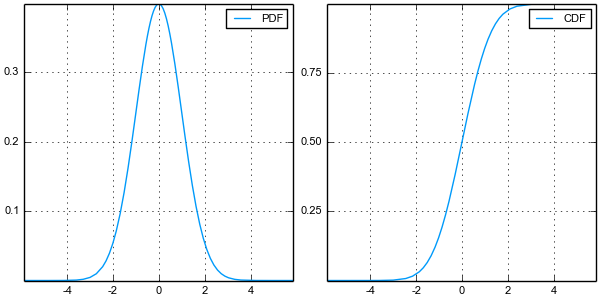

In [7]:
using Plots
pyplot(reuse=true, size=(600,300))

plot(
    plot(x -> pdf(N, x), -6, 6, label="PDF"),
    plot(x -> cdf(N, x), -6, 6, label="CDF")
)

Las distribuciones que poseen **parámetros de forma**, como la distribución Normal, se denominan **distribuciones paramétricas**. Estás definen una familia de funciones de densidad/masa de probabilidad, dependiendo de los parámetros que tomen.

In [11]:
animación = Animation()

@animate for μ in -2:0.1:2 # μ ∈ R
    
    PDF = plot(x -> pdf(Normal(μ,1), x), -6, 6, label=μ)
    CDF = plot(x -> cdf(Normal(μ,1), x), -6, 6, label=μ)
    
    vline!(PDF, [μ]); vline!(CDF, [μ])
    plot(PDF, CDF)
    frame(animación)
end

gif(animación, "Normal_mu.gif", fps=5)

INFO: Saved animation to /home/dzea/.julia/v0.5/AnalisisDeDatosCualitativos/material/Normal_mu.gif


Plots.AnimatedGif("/home/dzea/.julia/v0.5/AnalisisDeDatosCualitativos/material/Normal_mu.gif")

In [12]:
animación = Animation()

@animate for σ in 0.5:0.1:2 # σ > 0
    
    PDF = plot(x -> pdf(Normal(0,σ), x), -6, 6, ylim=(0,1), label=σ)
    CDF = plot(x -> cdf(Normal(0,σ), x), -6, 6, ylim=(0,1), label=σ)
    
    vline!(PDF, [-σ, σ]); vline!(CDF, [-σ, σ])
    plot(PDF, CDF)
    frame(animación)
end

gif(animación, "Normal_sigma.gif", fps=5)

INFO: Saved animation to /home/dzea/.julia/v0.5/AnalisisDeDatosCualitativos/material/Normal_sigma.gif


Plots.AnimatedGif("/home/dzea/.julia/v0.5/AnalisisDeDatosCualitativos/material/Normal_sigma.gif")


Esta distribución es importante debido al **Teorema Central del Límite**, según el cual, dada una muestra de valores *independientes e idénticamente distribuidos* de tamaño $n$ de una distribución con media poblacional $\mu$ y desviación estándar $\sigma$, la distribución de la media muestral $\overline{x_{n}}$ converge a una distribución  
$$\overline{x_{n}} \sim \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}})$$  
cuando $n \rightarrow \infty$.  
Debido a la **ley de los grandes números**, la media o promedio de la muestra se acercara a la media poblacional (valor esperado) a medida que el valor de $n$ aumenta. La desviación estándar de la distribución media muestral $\frac{\sigma}{\sqrt{n}}$ se denomina error estadístico.


#### Ejemplo

In [13]:
?Distributions.Exponential

```
Exponential(θ)
```

The *Exponential distribution* with scale parameter `θ` has probability density function

$$
f(x; \theta) = \frac{1}{\theta} e^{-\frac{x}{\theta}}, \quad x > 0
$$

```julia
Exponential()      # Exponential distribution with unit scale, i.e. Exponential(1)
Exponential(b)     # Exponential distribution with scale b

params(d)          # Get the parameters, i.e. (b,)
scale(d)           # Get the scale parameter, i.e. b
rate(d)            # Get the rate parameter, i.e. 1 / b
```

External links

  * [Exponential distribution on Wikipedia](http://en.wikipedia.org/wiki/Exponential_distribution)


In [14]:
distribución = Exponential(2)

Distributions.Exponential{Float64}(θ=2.0)


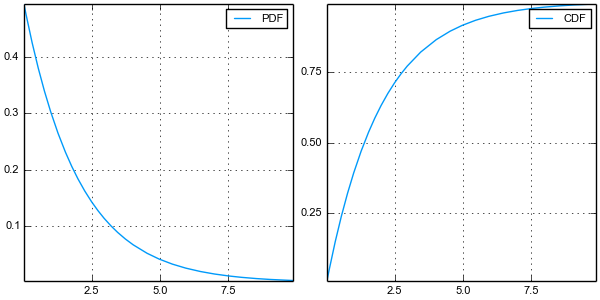

In [16]:
plot(
    plot(x -> pdf(distribución, x), 0, 10, label="PDF"),
    plot(x -> cdf(distribución, x), 0, 10, label="CDF")
)

In [17]:
mean(distribución)

2.0

In [18]:
std(distribución)

2.0

In [26]:
animación = Animation()

@animate for n in 5:5:100
    muestra = rand(distribución, n)
    histograma_muestra = histogram(muestra, legend=false, bins=10)
    
    estimada_muestra = fit(Exponential, muestra)
    PDF_población = plot(x -> pdf(estimada_muestra,x), 0, 6, labels="Estimada", ylim=(0,0.5))
    plot!(PDF_población, x -> pdf(distribución,x), 0, 6, labels="Limite")
    
    medias_muestrales = Float64[mean(rand(distribución, n)) for i in 1:100]
    histograma_media = histogram(medias_muestrales, legend=false, bins=10)
    
    estimada_media = fit(Normal, medias_muestrales)
    PDF_media = plot(x -> pdf(estimada_media,x), 0, 6, labels="Estimada", ylim=(0,2.5))
    plot!(PDF_media, x -> pdf(Normal(2,2/sqrt(n)),x), 0, 6, labels="Limite")
    
    
    plot(histograma_muestra, histograma_media, 
    PDF_población, PDF_media, grid=false,
         xlim=(0,6), yticks=nothing, layout=grid(2,2), title="n = $n")
    frame(animación)
end

gif(animación, "TCL.gif", fps=1)

INFO: Saved animation to /home/dzea/.julia/v0.5/AnalisisDeDatosCualitativos/material/TCL.gif


Plots.AnimatedGif("/home/dzea/.julia/v0.5/AnalisisDeDatosCualitativos/material/TCL.gif")

### Distribución T

La distribución T (de *Student*) con $n-1$ grados de libertad es la distribución que sigue la media de una muestra de tamaño $n$ cuando se le sustrae la media poblacional y se divide al valor restante por la desviación estándar de la muestra sobre $\sqrt{n}$, sólo si la población de la cual se obtiene la muestra tiene una **distribución normal**. 
$$t = \frac{\overline{X_{n}}-\mu}{\frac{S_{n}}{\sqrt{n}}}$$

In [13]:
?Distributions.TDist

```
TDist(ν)
```

The *Students T distribution* with `ν` degrees of freedom has probability density function

$f(x; d) = \frac{1}{\sqrt{d} B(1/2, d/2)}
\left( 1 + \frac{x^2}{d} \right)^{-\frac{d + 1}{2}}$
```julia
TDist(d)      # t-distribution with d degrees of freedom

params(d)     # Get the parameters, i.e. (d,)
dof(d)        # Get the degrees of freedom, i.e. d
```

External links

[Student's T distribution on Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution)


La distribución T converge hacia una distribución normal $\mathcal{N}(0,1)$ cuando $n \rightarrow \infty$.

In [30]:
animación = Animation()

@animate for n in 2:1:50
    x = -6.0:0.01:6.0
    plt = plot(x, x -> pdf(Normal(0,1), x), label="Normal(0,1)", xlim=(-6,6))
    plot!(plt, x, x -> pdf(TDist(n-1), x), label="n = $n")
    frame(animación)
end

gif(animación, "TStudent.gif", fps=2)

INFO: Saved animation to /home/dzea/.julia/v0.5/AnalisisDeDatosCualitativos/material/TStudent.gif


Plots.AnimatedGif("/home/dzea/.julia/v0.5/AnalisisDeDatosCualitativos/material/TStudent.gif")

### Binomial

La distribución binomial se utiliza con variables categóricas que sólo pueden tomar dos valores (dicotómicas) los cuales suelen denominarse *éxito* (`1`, `true`) y *fracaso* (`0`, `false`) generalmente (aunque no estén relacionados con la idea de éxito). El número de éxitos productos de $n$ ensayos (*ensayos de Bernoulli*) sigue una distribución binomial con parámetros $n$ y $p$, donde $p$ es la probabilidad de éxitos.  
La distribución Binomial(n,p) asumen que el valor de $n$ fue fijado y que $p$ es igual en cada uno de los $n$ ensayos. Es decir que **ensayos idénticos** (mismo $p$) e **independientes** dado que un ensayo no afecta a la probabilidad de otro.

In [31]:
?Distributions.Binomial

```
Binomial(n,p)
```

A *Binomial distribution* characterizes the number of successes in a sequence of independent trials. It has two parameters: `n`, the number of trials, and `p`, the probability of success in an individual trial, with the distribution:

$$
P(X = k) = {n \choose k}p^k(1-p)^{n-k},  \quad \text{ for } k = 0,1,2, \ldots, n.
$$

```julia
Binomial()      # Binomial distribution with n = 1 and p = 0.5
Binomial(n)     # Binomial distribution for n trials with success rate p = 0.5
Binomial(n, p)  # Binomial distribution for n trials with success rate p

params(d)       # Get the parameters, i.e. (n, p)
ntrials(d)      # Get the number of trials, i.e. n
succprob(d)     # Get the success rate, i.e. p
failprob(d)     # Get the failure rate, i.e. 1 - p
```

External links:

  * [Binomial distribution on Wikipedia](http://en.wikipedia.org/wiki/Binomial_distribution)


In [32]:
B = Binomial(10,0.5) # ej. Tirar 10 veces una moneda, éxito = cara

Distributions.Binomial{Float64}(n=10, p=0.5)


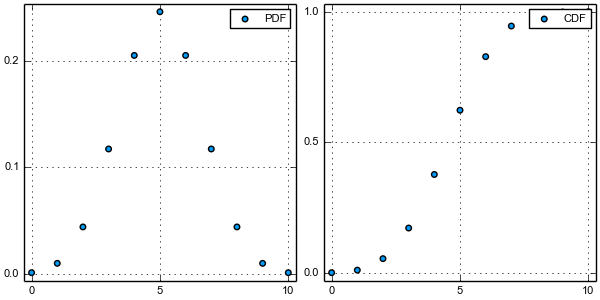

In [33]:
plot(
    scatter(0:1:10, x -> pdf(B, x), label="PDF"),
    scatter(0:1:10, x -> cdf(B, x), label="CDF")
)

In [34]:
pdf(B, 8) # Probabilidad de obtener 8 veces cara (8 éxitos)

0.04394531249999996

In [36]:
ccdf(B, 8) # Probabilidad de obtener 8 o más veces cara (8 o más éxitos)

0.010742187500000007

In [37]:
using RCall

INFO: Precompiling module RCall.
INFO: Using R installation at /usr/lib/R


In [38]:
R"dbinom(8,10,0.5)" # PDF de una distribución Binomial con n=10 (size) y p=0.5 (prob), d es por density 

RCall.RObject{RCall.RealSxp}
[1] 0.04394531


In [39]:
R"1 - pbinom(8,10,0.5)" # CDF de la distribución Binomial con n=10 (size) y p=0.5 (prob)

RCall.RObject{RCall.RealSxp}
[1] 0.01074219


### Distribución Multinomial

La distribución multinomial es una generalización de la **distribución binomial**, pudiendo representar más de dos categorías. Para $n$ ensayos independientes que pueden dar un *éxito* solo en una de $k$ categorías, teniendo cada categoría una probabilidad de éxito fija, la distribución multinomial da la probabilidad de una combinación de números de éxitos particular para varias categorías. Los parámetros de la distribución multinomial son $n$ y la probabilidad de éxito $p_{k}$ de cada categoría $k$.

#### ¿Cuál es la probabilidad de obtener generala servida?

In [40]:
pₖ = [ 1/6 for i in 1:6 ] # Cada cara/categoría es equiprobable (k puede 1, 2, 3, 4, 5 o 6)

6-element Array{Float64,1}:
 0.166667
 0.166667
 0.166667
 0.166667
 0.166667
 0.166667

In [41]:
using Base.Test

@test_approx_eq sum(pₖ) 1.0 # La suma de pₖ para todos los valores de k debe ser 1

In [42]:
distribución = Multinomial(5, pₖ) # Se tiran 5 dados (n = 5, cada dado es independiente)

Distributions.Multinomial{Float64}(n=5, p=[0.166667,0.166667,0.166667,0.166667,0.166667,0.166667])

In [43]:
# Generala son 5 veces la misma cara. 
# Hay una generala posible por cada cara.
P_generala = 6 * pdf(distribución, [5,0,0,0,0,0]) 

0.0007716049382716055

##### Tomando muestras de la distribución

Una manera de estimar la misma probabilidad, es tomar muestras randoms generadas a partir de esa distribución multinomial y contar la cantidad de veces que aparece una generala. Sería equivalente a tomar cinco dados, lanzarlos un número `N` de veces y contar la cantidad de veces que obtenemos una generala y para dividir ese número por `N`.

In [44]:
N = 10_000
muestras = rand(distribución, N) # Cada columna es una muestra

6×10000 Array{Int64,2}:
 0  0  1  1  1  4  1  1  3  1  1  1  1  …  2  3  1  1  1  2  1  1  1  0  1  0
 2  1  0  0  0  0  0  3  0  2  0  1  1     3  0  2  2  2  2  2  1  0  2  1  1
 0  3  1  1  2  0  2  0  0  0  0  3  1     0  0  1  1  0  0  0  0  1  0  1  0
 0  0  0  2  2  0  0  0  0  0  1  0  0     0  0  1  0  0  1  0  1  0  0  1  2
 3  1  1  0  0  0  2  1  1  2  0  0  2     0  1  0  1  1  0  1  1  0  3  0  1
 0  0  2  1  0  1  0  0  1  0  3  0  0  …  0  1  0  0  1  0  1  1  3  0  1  1

In [45]:
generalas = sum(muestras .== 5, 1)

1×10000 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0

In [46]:
mean(generalas)

0.0009

Notar que al final tenemos una variable aleatoria categórica dicotómica, es o no es generala. La cual se muestrea `N` veces, en `N` ensayos de Bernoulli idénticos e independientes. Por lo tanto, el número total de generalas obtenidas sigue una distribución `Binomial(N,P_generala)`.

In [53]:
muestras_de_muestras = Float64[ sum(rand(distribución, N) .== 5)  for i in 1:1000 ]

1000-element Array{Float64,1}:
  4.0
  5.0
 14.0
 11.0
  8.0
  5.0
  8.0
  6.0
 10.0
  7.0
  6.0
  7.0
  3.0
  ⋮  
  4.0
  4.0
  4.0
 14.0
  5.0
  5.0
  5.0
  7.0
  5.0
  6.0
  9.0
  7.0


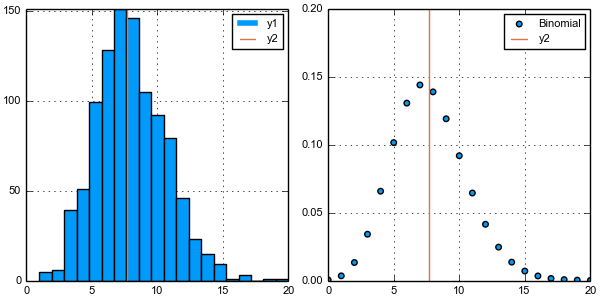

In [54]:
valor_esperado = N * P_generala

histograma = histogram(muestras_de_muestras, bins=20)
vline!(histograma, [valor_esperado])

binomial = scatter(0:20, x -> pdf(Binomial(N,P_generala), x), label="Binomial", ylim=(0,0.2))
vline!(binomial, [valor_esperado])

plot(histograma, binomial, xlim=(0,20))

## Poisson 

In [55]:
?Poisson

search: Poisson PoissonBinomial



```
Poisson(λ)
```

A *Poisson distribution* descibes the number of independent events occurring within a unit time interval, given the average rate of occurrence `λ`.

$$
P(X = k) = \frac{\lambda^k}{k!} e^{-\lambda}, \quad \text{ for } k = 0,1,2,\ldots.
$$

```julia
Poisson()        # Poisson distribution with rate parameter 1
Poisson(lambda)       # Poisson distribution with rate parameter lambda

params(d)        # Get the parameters, i.e. (λ,)
mean(d)          # Get the mean arrival rate, i.e. λ
```

External links:

  * [Poisson distribution on Wikipedia](http://en.wikipedia.org/wiki/Poisson_distribution)


In [56]:
animación = Animation()

@animate for λ in 1:15 # λ > 0
    
    PDF = scatter(0:30, x -> pdf(Poisson(λ), x), label=λ)
    CDF = scatter(0:30, x -> cdf(Poisson(λ), x), label=λ)
    
    vline!(PDF, [λ]); vline!(CDF, [λ])
    plot(PDF, CDF)
    frame(animación)
end

gif(animación, "Poisson_mu.gif", fps=1)

INFO: Saved animation to /home/dzea/.julia/v0.5/AnalisisDeDatosCualitativos/material/Poisson_mu.gif


Plots.AnimatedGif("/home/dzea/.julia/v0.5/AnalisisDeDatosCualitativos/material/Poisson_mu.gif")